In [1]:
import h5py
import numpy as np

In [2]:
#High level features
# link: http://mlphysics.ics.uci.edu/data/hepjets/highlevel/test_no_pile_5000000.h5
# you can use : $ wget http://mlphysics.ics.uci.edu/data/hepjets/highlevel/test_no_pile_5000000.h5
f = h5py.File("./test_no_pile_5000000.h5",'r')
[i for i in f]


['features', 'targets']

In [3]:
# prepare array to  store data
targets = f['targets'][()]
features = f['features'][()] 
j0 = np.array([features[i] for i in range(len(features)) if targets[i]==0])
j1 = np.array([features[i] for i in range(len(features)) if targets[i]==1])

In [4]:
# show the array value
j0[:,0]

array([17.1676, 52.9099, 22.9799, ..., 43.7291, 34.513 , 18.5032],
      dtype=float32)

In [5]:
import matplotlib.pyplot as plt

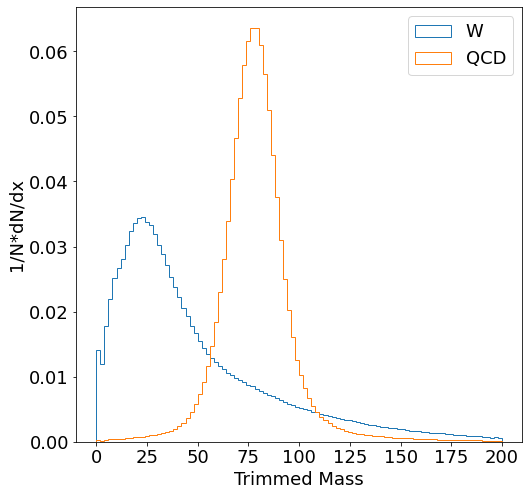

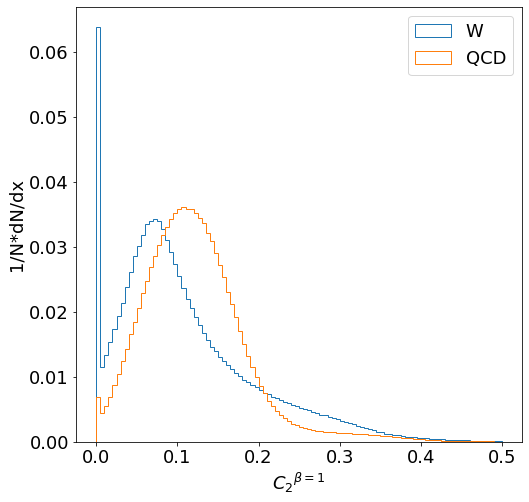

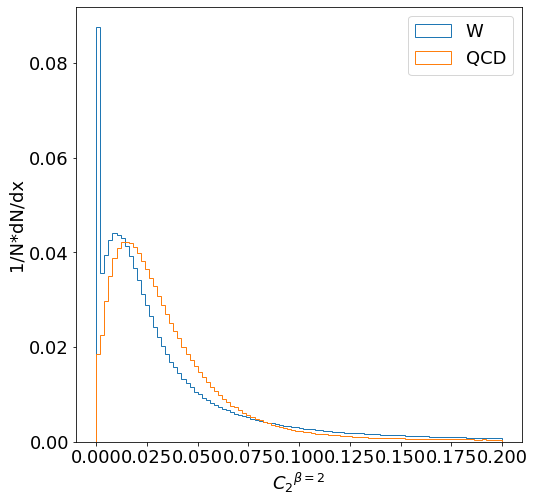

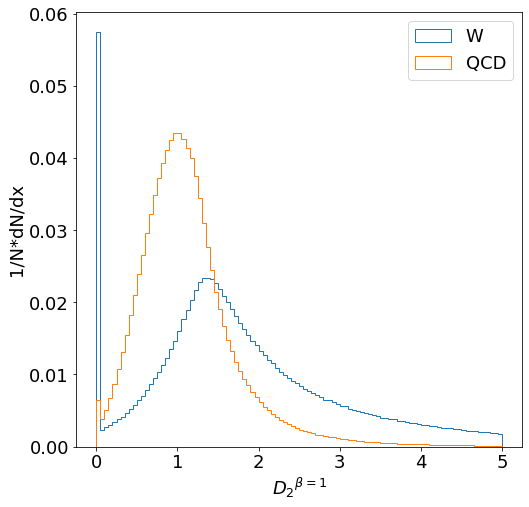

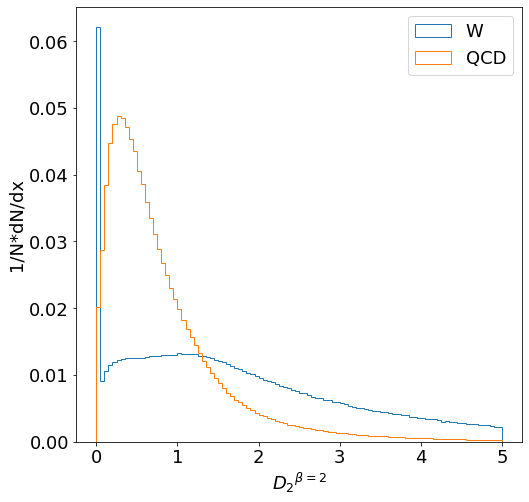

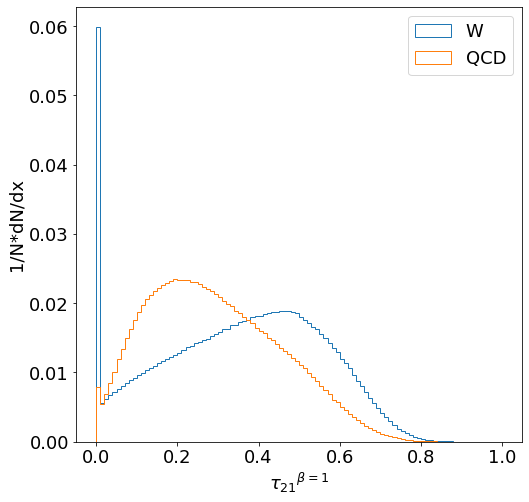

In [6]:
## Plot high level features

# features label
# you can see: https://pythonforundergradengineers.com/unicode-characters-in-python.html
label = ['Trimmed Mass', '${{C_2}^{\u03B2=1}}$', '${{C_2}^{\u03B2=2}}$', '${{D_2}^{\u03B2=1}}$', '${{D_2}^{\u03B2=2}}$', '${{\u03C4_{21}}^{\u03B2=1}}$'] 

# plot range
# upper bound for each feature
inv = [200, 0.5, 0.2, 5, 5, 1]

# for loop to plot 6 high level features
for n in range(6):
    
    W = j0[:,n]*0+1/len(j0[:,n]) # set normalize weight
    bins = 100 
    fs=18 # front size
    tagsize = 18 # label tag size ((\blue block) W \n (\orange block) QCD )
    plt.figure(figsize=(8,8)) # plotsize
    x1, x2 = 0, inv[n]
    # plt.subplot(1,4,1)
    plt.hist(j0[:,n],bins=bins, histtype='step', weights = W, range=[x1, x2], label='W')
    plt.hist(j1[:,n],bins=bins, histtype='step', weights = W, range=[x1, x2], label='QCD')
    plt.legend(prop={'size': tagsize}) # plot label tag
    # plt.yscale('log') 
    plt.xlabel(label[n], fontsize=fs)  # plot x-axis label
    plt.ylabel("1/N*dN/dx", fontsize=fs)  # plot y-axis label
    plt.xticks(fontsize=fs)   # set x-ticks size
    plt.yticks(fontsize=fs)   # set y-ticks size
#     plt.savefig("./jet_highlevel_features_density_"+str(n)+".png")  #save figure as png
    plt.show()

In [7]:
# jet image load data
# link: http://mlphysics.ics.uci.edu/data/hepjets/images/test_no_pile_5000000.h5
# change file name to : test2_no_pile_5000000.h5
f2 = h5py.File("./test2_no_pile_5000000.h5",'r')
[i for i in f2]

['features', 'targets']

In [8]:
# jet image
targets2 = f2['targets'][()]
features2 = f2['features'][()]
j20 = np.array([features2[i] for i in range(len(features2)) if targets2[i]==0])
j21 = np.array([features2[i] for i in range(len(features2)) if targets2[i]==1])

In [9]:
# sum over all 2D-matrix
X = np.sum(j20, axis=0)
Y = np.sum(j21, axis=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


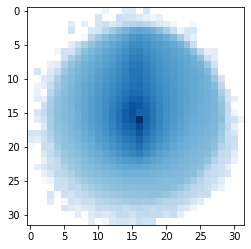

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


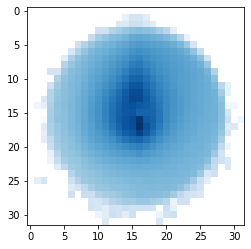

In [10]:
# jet image
# log scale (ignore zero value)
plt.imshow(np.log(X[0]), cmap='Blues', label = 'W')
# plt.savefig("./jet_image_W.png")
plt.show()

plt.imshow(np.log(Y[0]), cmap='Blues', label = 'QCD')
# plt.savefig("./jet_image_QCD.png")
plt.show()

In [45]:
# def isinteger(x):
#     return np.equal(np.mod(x, 1), 0)

# def within(v, lm):
#     return (lm[0]<=v)&(v<lm[1])
    
# def matrix_rep(a, bins=32, R = 0.4, limit = False):
#     if (not limit):
#         limit = np.array((-R,R))
#     else:
#         limit = np.array(limit)
        
#     if (not isinteger(np.log2(bins))):
#         print("You should use 2^n bins for integer n ")
    
#     dl = (limit[1]-limit[0])/bins
    
#     matrix = [] 
#     for k in a:
#         b = bins
#         vlb  = limit[0]
#         vub = limit[1]
#         if not within(k, limit):
#             matrix.append(-1)
#         else:
#             while(b!=1):
#                 b = b//2
#                 r1 = (vlb, (vlb+vub)/2)
#                 r2 = ((vlb+vub)/2, vub)
#                 if within(k,r1):
#                     vub = (vlb+vub)/2
#                 if within(k,r2):
#                     vlb = (vlb+vub)/2
#                 if b==1:
#                     matrix.append((vlb-limit[0])/dl)
#                     break
#     return matrix
            
            
            
    
    
    
    
    
        
    

In [11]:
import sys
import os

# First decide which gpu to use. May find nothing acceptible and fail.
gpuid = 0
print('Running from GPU %s' % str(gpuid))
os.environ['THEANO_FLAGS'] = "mode=FAST_RUN,device=gpu%d,floatX=float32,force_device=True" % (gpuid)

import keras
from keras.layers import Input, Embedding, LSTM, Dense, merge
from keras.models import Model, Sequential


Using TensorFlow backend.


Running from GPU 0


In [12]:
from keras.layers.core import Dense, Dropout, Activation, Flatten#, Merge
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD, Adam
from keras.utils.io_utils import HDF5Matrix
from keras.callbacks import LearningRateScheduler, EarlyStopping
import h5py
import numpy as np
from numpy import array
import pickle
import glob
# import contexter  #I can not import

In [ ]:
##Download training data : 
# $wget http://mlphysics.ics.uci.edu/data/hepjets/images/train_no_pile_10000000.h5 
# rename it 'train2_no_pile_10000000.h5'
# $wget http://mlphysics.ics.uci.edu/data/hepjets/highlevel/train_no_pile_10000000.h5


In [16]:
def data_generator(h5file1, h5file2, batchsize, hlindices, start=0, stop=None):
    stop = ((stop-start) // batchsize) * batchsize + start
    assert (stop-start) % batchsize     == 0  # Batches will not exceed stop.

    with h5py.File(h5file1, 'r') as f1, h5py.File(h5file2, 'r') as f2:
        assert f1['features'].shape[0] >= stop
        assert f1['features'].shape[0] == f1['targets'].shape[0]
        assert f1['features'].shape[0] == f2['features'].shape[0]
        assert f1['targets'].shape[0] == f2['targets'].shape[0]
        iexample = start
        
        while True:
            assert iexample >= start
            assert iexample+batchsize <= stop
            batch = slice(iexample, iexample + batchsize)

            X  = f1['features'][batch] # Images.
            Y  = f1['targets'][batch]
            #X2 = f2['features'][batch][:, hlindices] # High-level.
            #Y2 = f2['targets'][batch]  
            #assert np.all(Y == Y2)
            
            X = np.log(1.0+X) / 4.0 
            
            #yield X, Y
            #yield {'input_0':X, 'input_1':X2}, {'output':Y}
            yield {'input_0':X}, {'output':Y}
            
            iexample += batchsize
            if iexample >= stop:
                assert iexample == stop
                iexample = start
    

def train():
    ###############################################################################
    # Dataset                                                                     #
    ###############################################################################
    #filename = '/home/pjsadows//ml/data/physics/jets/download4/datasets/train_no_pile_10000000.h5'
    hlindices = np.array(['mass', 'c1b1']) # Order of features: mass, c1b1,c2b2,d1b2,d2b2, tau

    #filename  = '/Volumes/Free Space/images/train_no_pile_10000000.h5'
    #filename2 = '/Volumes/Free Space/highlevel/train_no_pile_10000000.h5'

    filename  = './train2_no_pile_10000000.h5' #image input
    filename2 = './train_no_pile_10000000.h5' #high level features input

    N_train, N_valid = 9500000, 500000
    generator = data_generator(filename, filename2, batchsize=100, hlindices=hlindices, start=0, stop=N_train)
    validation_data = data_generator(filename, filename2, batchsize=100, hlindices=hlindices, start=N_train, stop=N_train+N_valid)

    #filename_test  = '/Volumes/Free Space/images/test_no_pile_5000000.h5'
    #filename2_test = '/Volumes/Free Space/highlevel/test_no_pile_5000000.h5'

    filename_test  = './test2_no_pile_5000000.h5'
    filename2_test = './test_no_pile_5000000.h5'

    N_test = 5000000
    generator_test = data_generator(filename_test, filename2_test, batchsize=100, hlindices=hlindices, start=0, stop=N_test)

    ###############################################################################
    # Model                                                                       #
    ###############################################################################
    act  = 'relu' 
    init = 'glorot_normal' #'glorot_normal'#'he_normal'
    width = 500 #500 
    # Image arm
    nconv  = 4
    nch    = 32
    # Head
    nhead = 4
    ndo   = 2 
    
    # Arm 0: images
    input_0 = Input(shape=(1,32,32), dtype='float32', name='input_0') # We can name an layer by passing name.
    x0 = input_0
    for i in range(nconv):
        x0 = Convolution2D(nch,1, subsample=(1,1), border_mode='valid', init=init, activation=act)(x0) # nch, 4, 4
    x0 = Flatten()(x0) 

    # Arm 1: high-level variables.
    #input_1  = Input(shape=(len(hlindices),), name='input_1')
    #x1 = input_1
    #for i in range(nhl):
    #    x1 = Dense(width, init=init, activation=act)(x1)

    # Head
    #x = merge([x0, x1], mode='concat')
    x = x0
    for i in range(nhead):
        x = Dense(width, activation=act, init=init)(x)
        if i >= nhead - ndo:
            x = Dropout(p=0.5)(x)
    output = Dense(1, activation='sigmoid', name='output')(x)

    # Model
    #model = Model(input=[input_0, input_1], output=[output])
    model = Model(input=[input_0], output=[output])
    lrinit  = 0.0001 
    lrdecay = 0.8
    optimizer = Adam(lr=lrinit, beta_1=0.99, beta_2=0.999, epsilon=1e-08)
    model.compile(optimizer=optimizer,loss={'output':'binary_crossentropy'}, metrics=['accuracy'])

    ###############################################################################
    # Algorithm                                                                   #
    ###############################################################################
    def lr_scheduler(epoch):
        return lrinit * lrdecay ** epoch
    lrschedule = LearningRateScheduler(lr_scheduler)
    stopping   = EarlyStopping(monitor='val_loss', patience=0, verbose=0, mode='min') 
    cbks = [stopping, lrschedule]

    # Copy script so that we can reconstruct model later.
    filebase = './images_conv%d_dense%d_nch%d_do%d_width%d_%s_lrd%d_%d' % (nconv, nhead, nch, ndo, width, act, lrdecay*100, np.random.randint(1000))
    fileout = filebase + '.py'
    os.system('cp %s %s' % (__file__, fileout))
    print('Saving to %s' % fileout)
    
    # Train.
    nb_epoch  = 1000
    history = model.fit_generator(generator, samples_per_epoch=N_train, nb_epoch=nb_epoch, verbose=1, validation_data=validation_data, nb_val_samples=N_valid, class_weight=None, callbacks=cbks) 

    # Save model.
    fileout = filebase + '.h5'
    model.save_weights(fileout, overwrite=True)
    # Save pkl.
    fileout = filebase + '.pkl'
    with open(fileout, 'w') as f:
        pickle.dump(history.history, f)
    # Save .yaml script.
    fileout = filebase + '.yaml'
    with open(fileout, 'w') as f:
        f.write(model.to_yaml())

    # Compute test error accuracy.
    vals = model.evaluate_generator(generator_test, val_samples=N_test, max_q_size=10)
    for name, val in zip(model.metrics_names, vals):
        print('test_%s: %f' % (name, val))
        history.history['test_' + name] = val
    # Compute AUC
    #auc = compute_auc(model, generator_test, val_samples=N_test)
    #print 'Test AUC: %f' % auc
    #history.history['test_auc'] = auc

    # Save pkl.
    fileout = filebase + '.pkl'
    with open(fileout, 'w') as f:
        pickle.dump(history.history, f)


    return history.history['val_loss'][-1]

# if __name__=='__main__':
#     loss = train()
#     print(loss)


In [17]:
train()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:78: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, 1, activation="relu", strides=(1, 1), padding="valid", kernel_initializer="glorot_normal")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:91: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(500, activation="relu", kernel_initializer="glorot_normal")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:93: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.5)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:98: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`


NameError: name '__file__' is not defined